# Group Proposal


**Authors:** Bryan Chang, Linda Huang, Jade Jordan, Inan Latif

**Group:** 5

## Introduction

Bike theft is a common concern among Vancouverites, with cycling being a primary mode of transportation for many throughout the city. As such, it would be beneficial for cycling commuters to know how to reduce the chances of their bikes being stolen. To approach this, we are going to analyze the frequency of bike thefts in each Vancouver neighbourhood alongside the time of day (hour) in which they occur, so that people can better prepare to keep their bikes safe in these locations and time-periods.

The data set which we are using is published directly by the Vancouver Police Department (VPD) with options for you to filter out crime data from 2003 to 2022, inclusive. Along with that, you are also able to filter by any of the neighbourhoods of Vancouver proper. We will filter X columns…

**Response variable + test of interest:** 

**Research Question:** what location and time of day is bike theft most common?

**filter out:** bike theft, hour, neighbourhood



****


## Preliminary Results


In [28]:
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(infer)
library(grid)
library(gridExtra)
library(taxyvr)
library(cowplot)

In [29]:
#Reading data into R, and renaming all columns to a standard format
crime_data <- 
    read.csv("CrimeData.csv") %>%  
    setNames(c("type",
               "year",
               "month",
               "day",
               "hour",
               "minute",
               "hundred_block",
               "neighbourhood",
               "x",
               "y"))

head(crime_data)

,type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft from Vehicle,2019,10,10,20,0,12XX W 76TH AVE,Marpole,490316.5,5449844
2,Theft from Vehicle,2019,3,19,21,45,12XX W 7TH AVE,Fairview,490387.2,5456955
3,Theft from Vehicle,2019,5,3,17,0,12XX W 8TH AVE,Fairview,490298.3,5456855
4,Theft from Vehicle,2019,3,4,0,0,12XX W 8TH AVE,Fairview,490368.2,5456863
5,Theft from Vehicle,2019,3,29,23,0,12XX W 8TH AVE,Fairview,490381.3,5456853
6,Theft from Vehicle,2019,12,17,5,16,12XX W 8TH AVE,Fairview,490441.0,5456852


## Cleaning Data

In [32]:
#filtering out type and minute column
crime_select <- crime_data %>% select(-type, -minute)

#renaming hundred_block to a more human readable format
crime_rename <- crime_select %>% 
                mutate(address = hundred_block) %>% 
                select(-hundred_block)
days_by_m <- c(0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334)
crime_newcol <- crime_rename %>%
                mutate(day = day + days_by_m[month]) %>%
                select(-month, -x, -y, -address)
head(crime_newcol)

,year,day,hour,neighbourhood
,<int>,<dbl>,<int>,<chr>
1,2019,283,20,Marpole
2,2019,78,21,Fairview
3,2019,123,17,Fairview
4,2019,63,0,Fairview
5,2019,88,23,Fairview
6,2019,351,5,Fairview


In [53]:
# Drop irrelevant columns and rows.

,neighbourhood,day
,<chr>,<dbl>
1,Marpole,283
2,Fairview,78
3,Fairview,123
4,Fairview,63
5,Fairview,88
6,Fairview,351


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



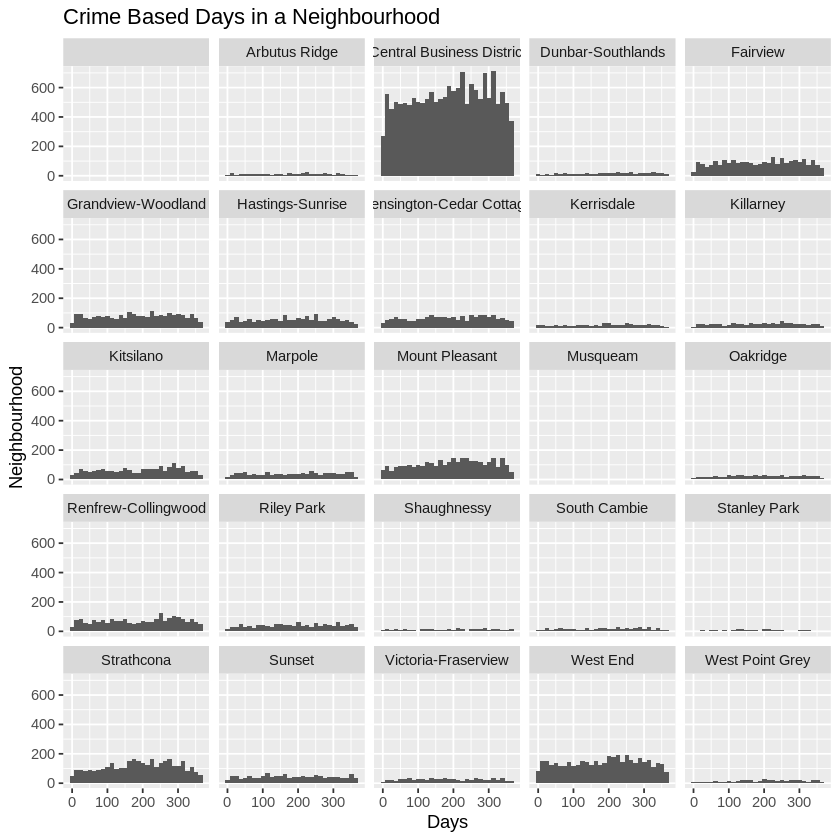

In [54]:
crime_neighbourhood_day <- crime_newcol %>%
                           select(neighbourhood,day)

head(crime_neighbourhood_day)

crime_neighbourhood_day_hist <- crime_newcol %>%
ggplot(aes(x = day)) +
geom_histogram()+
ggtitle("Crime Based Days in a Neighbourhood") +
labs(x = "Days", y = "Neighbourhood") +
facet_wrap(~ neighbourhood)
crime_neighbourhood_day_hist

On these histogram plots we have chosen to place "Day" on the x-axis. Also, we are using `facet_wrap()` to compare the histogram plots of each neighbourhood by crime rate. We can clearly see there is a major variation in results depending on neighbourhood and time. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



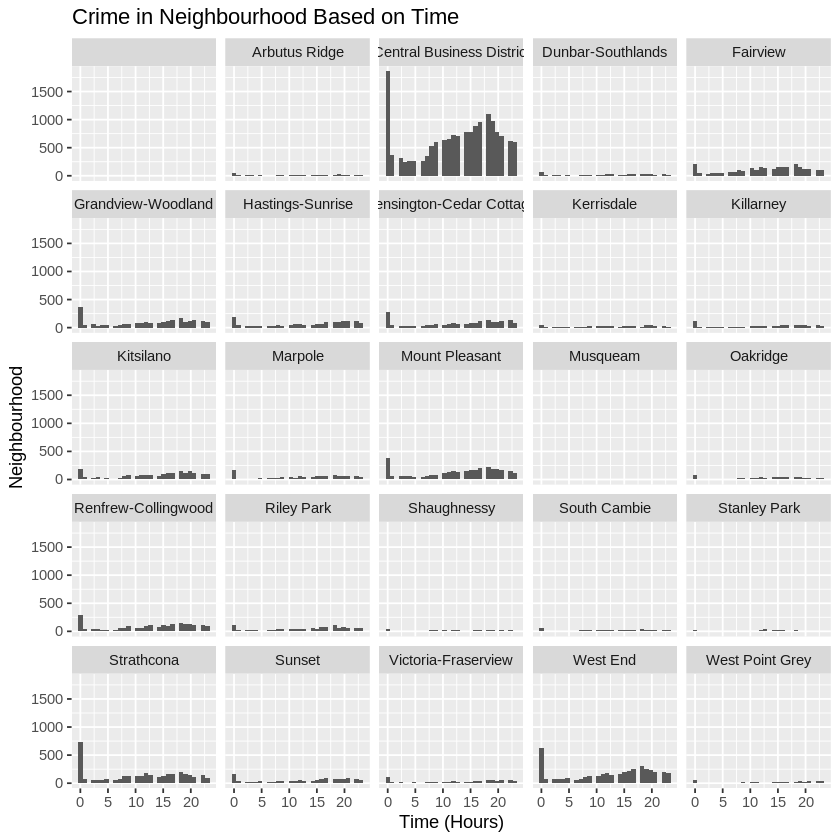

In [58]:
crime_neighbourhood_day_hist2 <- crime_newcol %>%
                                 ggplot(aes(x = hour)) +
                                 geom_histogram()+
                                 ggtitle("Crime in Neighbourhood Based on Time") +
                                 labs(x = "Time (Hours)", y = "Neighbourhood") +
                                 facet_wrap(~ neighbourhood)

crime_neighbourhood_day_hist2

#### Bootstrap sampling distribution:

In [59]:
# Generate the bootstrap sampling distribution
set.seed(4321)

null_model_bike_crime <- crime_data_sample %>%
                         specify(response = day) %>% 
                         generate(type = "bootstrap", reps = 100) %>% 
                         calculate(stat = "mode")

head(null_model_bike_crime)

ERROR: Error in t.test.default(response_variable(x)): not enough 'x' observations


## Methods & Plan

**Add Methods:**



After inferential analysis of our data, we expect to find the Vancouver neighbourhood with the highest frequency of bike thefts. From that, we will visualize frequency of thefts by time. These findings could help cyclists prepare themselves to keep their property safe, or perhaps avoid cycling in specific areas/times.



**add future progression/research**

What do you expect to find?

What impact could such findings have?

What future questions could this lead to?


